In [0]:
import pandas as pd
import seaborn as sns

In [0]:
df = spark.read.format('csv').option('header','true').option('delimeter',',').option('inferSchema','true').load('dbfs:/FileStore/Salary_Data.csv')

In [0]:
df_pd = df.toPandas()

In [0]:
df_pd.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [0]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [0]:
df_pd.isnull().sum()

Out[6]: Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [0]:
duplicate_rows = df_pd[df_pd.duplicated()]

In [0]:
duplicate_rows.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0


In [0]:
df_pd.shape

Out[14]: (6704, 6)

In [0]:
df_non_null = df_pd.dropna()

In [0]:
df_non_null.isnull().sum()

Out[23]: Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [0]:
list(map(lambda x : df_non_null.value_counts(),df_non_null.columns))

Out[29]: [Age   Gender  Education Level    Job Title          Years of Experience  Salary  
 24.0  Female  High School        Receptionist       0.0                  25000.0     45
 27.0  Male    Bachelor's Degree  Software Engineer  3.0                  80000.0     45
 32.0  Male    Bachelor's Degree  Product Manager    7.0                  120000.0    45
               Bachelor's         Software Engineer  8.0                  190000.0    39
 33.0  Female  Master's           Product Manager    11.0                 198000.0    38
                                                                                      ..
 26.0  Female  Bachelor's         Data Analyst       3.0                  120000.0     1
 34.0  Female  High School        Sales Executive    5.0                  70000.0      1
               Master's           Business Analyst   5.0                  80000.0      1
                                  Financial Advisor  10.0                 95000.0      1
 35.0  Male    PhD

In [0]:
df_non_null['Age'].value_counts()

Out[32]: 27.0    516
30.0    449
29.0    444
28.0    429
33.0    398
26.0    393
31.0    364
32.0    351
34.0    309
25.0    284
36.0    281
24.0    240
35.0    200
42.0    176
43.0    158
39.0    158
37.0    156
38.0    149
45.0    144
41.0    129
44.0    126
23.0    104
46.0    102
48.0     98
40.0     92
49.0     91
50.0     88
54.0     68
47.0     47
51.0     30
52.0     29
21.0     18
55.0     16
22.0     15
56.0     11
57.0      9
53.0      7
58.0      7
62.0      5
60.0      5
61.0      2
Name: Age, dtype: int64

In [0]:
df_non_null['Gender'].value_counts()

Out[33]: Male      3671
Female    3013
Other       14
Name: Gender, dtype: int64

In [0]:
df_non_null['Job Title'].value_counts()

Out[34]: Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Software Project Manager        1
Name: Job Title, Length: 191, dtype: int64

In [0]:
df_non_null.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [0]:
count_null = pd.DataFrame(df_non_null.isna().sum())
count_null

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


In [0]:
df_non_null.corr()

,Age,Years of Experience,Salary
Age,1.000000,0.937725,0.728061
Years of Experience,0.937725,1.000000,0.808968
Salary,0.728061,0.808968,1.000000


Out[49]: <AxesSubplot:>

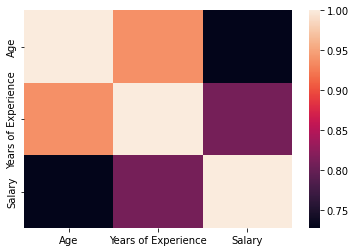

In [0]:
sns.heatmap(df_non_null.corr())

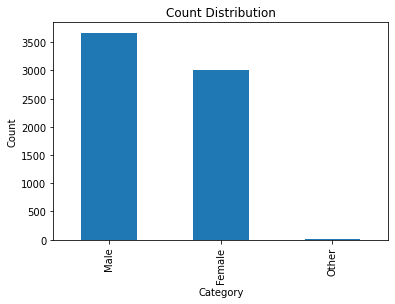

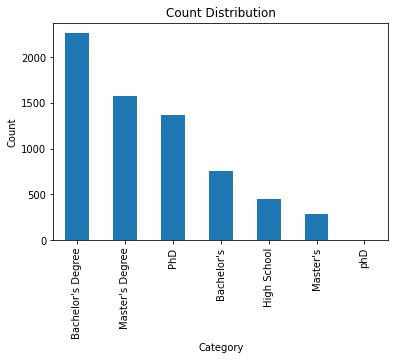

In [0]:
import matplotlib.pyplot as plt
object_columns = df_non_null.select_dtypes(include='object')
for x in object_columns.columns:
    if x == 'Job Title':
        pass
    else:
        count_per_category = df_non_null[f'{x}'].value_counts()
        count_per_category.plot(kind='bar')
        plt.title('Count Distribution')
        plt.xlabel('Category')
        plt.ylabel('Count')
        plt.show()

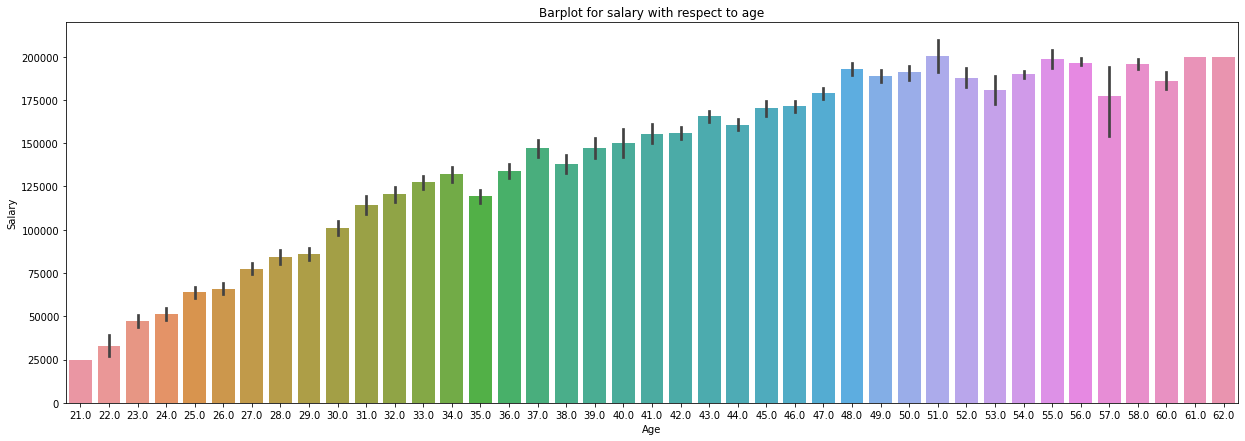

In [0]:
plt.figure(figsize=(21,7))
ax=sns.barplot(x="Age", y="Salary",data=df_non_null)
ax.set_title('Barplot for salary with respect to age')
plt.show()

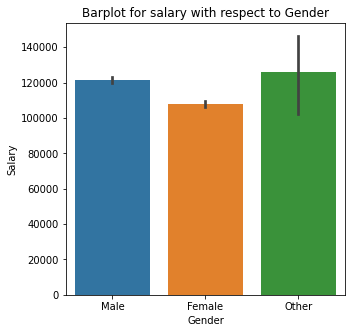

In [0]:
plt.figure(figsize=(5,5))
ax=sns.barplot(x="Gender", y="Salary",data=df_non_null)
ax.set_title('Barplot for salary with respect to Gender')
plt.show()

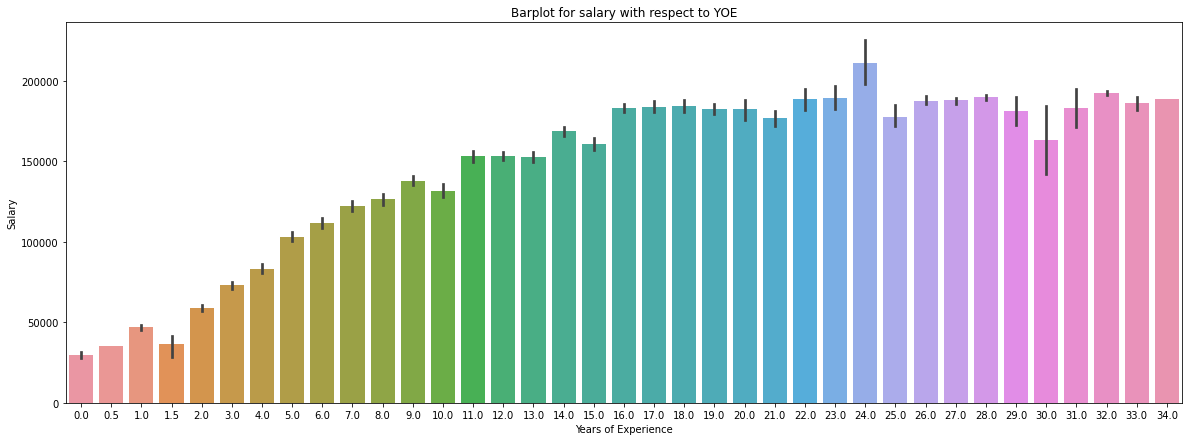

In [0]:
plt.figure(figsize=(20,7))
ax=sns.barplot(x="Years of Experience", y="Salary",data=df_non_null)
ax.set_title('Barplot for salary with respect to YOE')
plt.show()

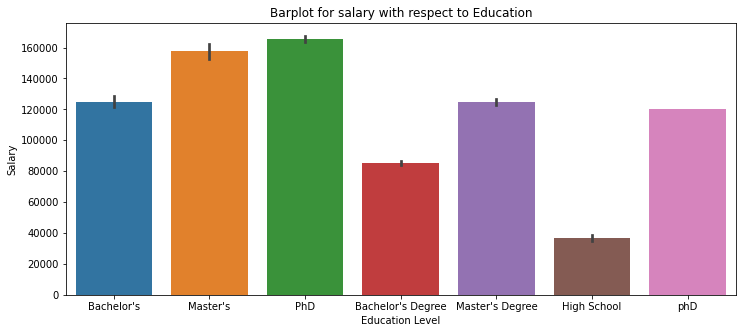

In [0]:
plt.figure(figsize=(12,5))
ax=sns.barplot(x="Education Level", y="Salary",data=df_non_null)
ax.set_title('Barplot for salary with respect to Education')
plt.show()

<Figure size 720x576 with 0 Axes>

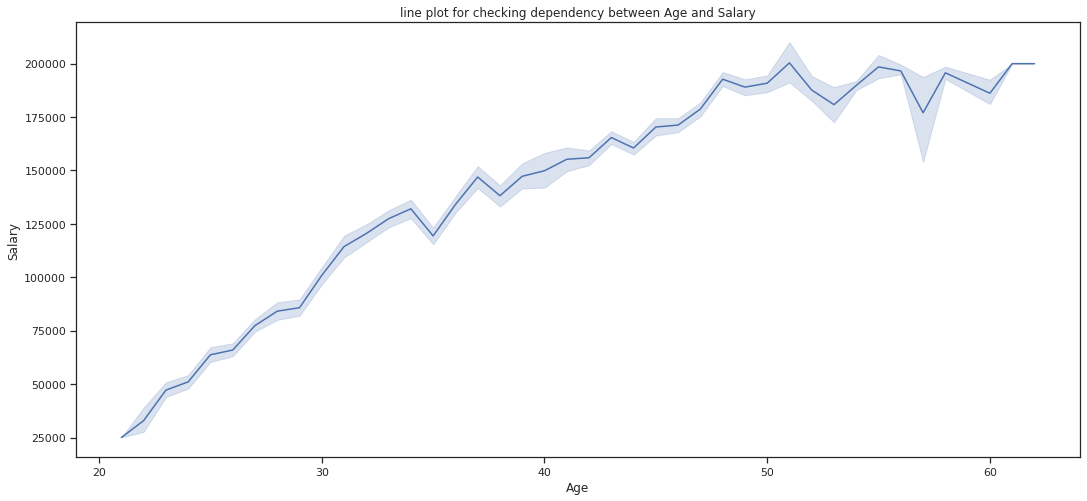

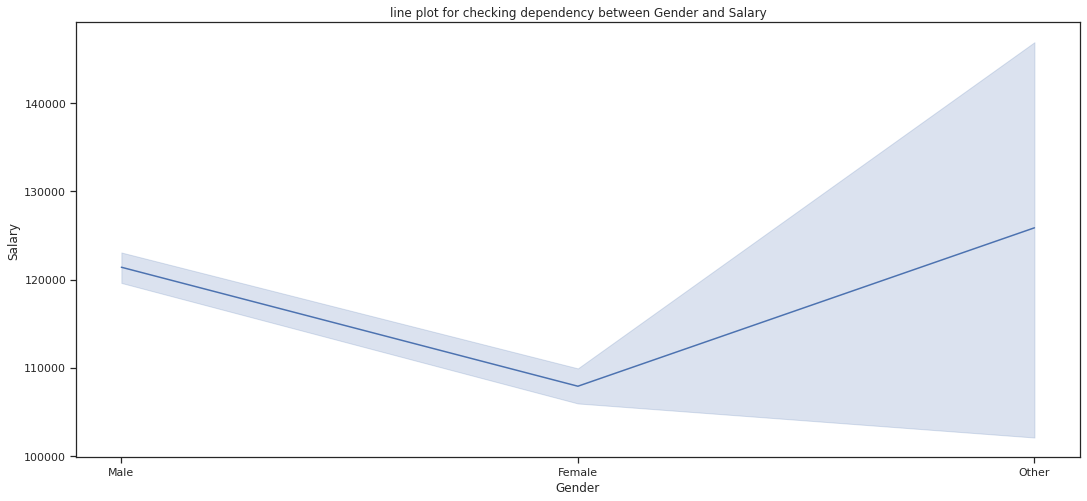

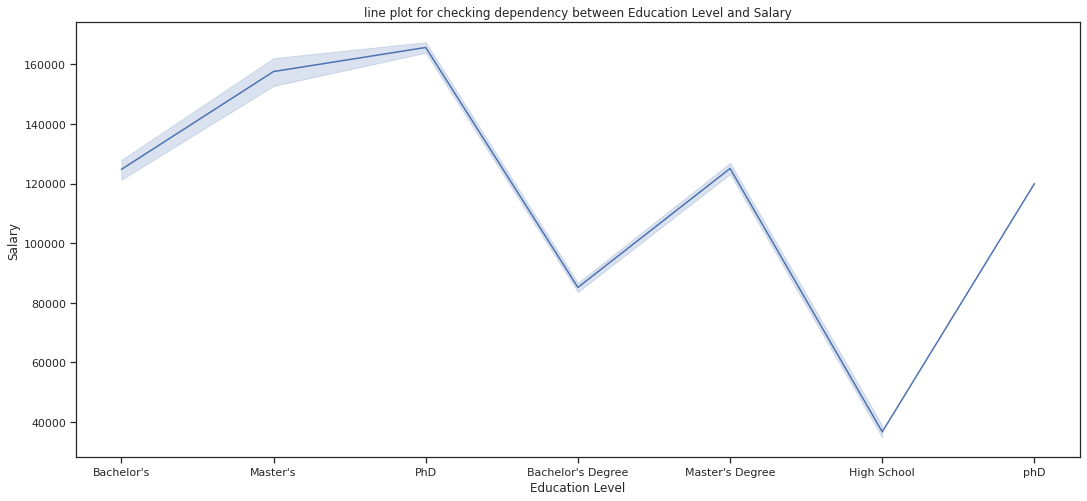

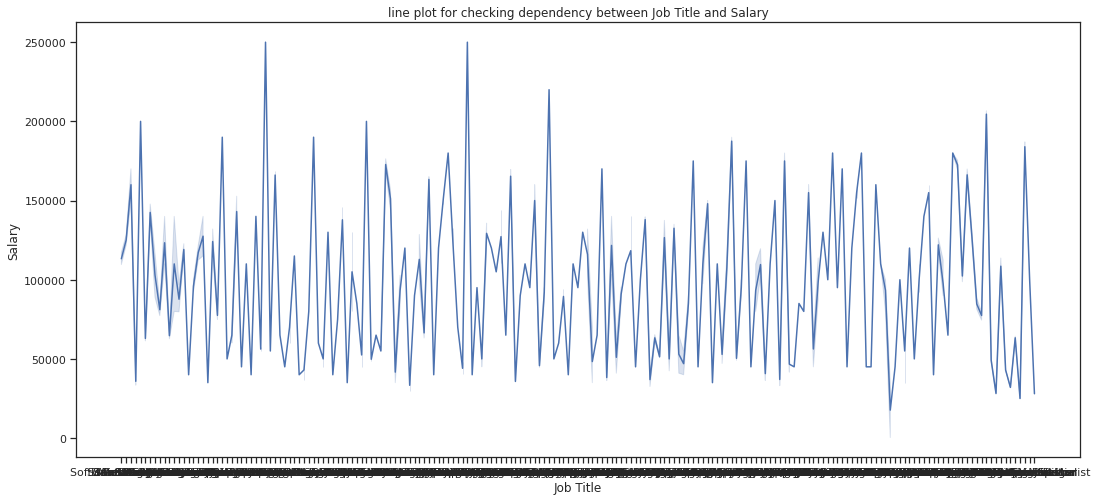

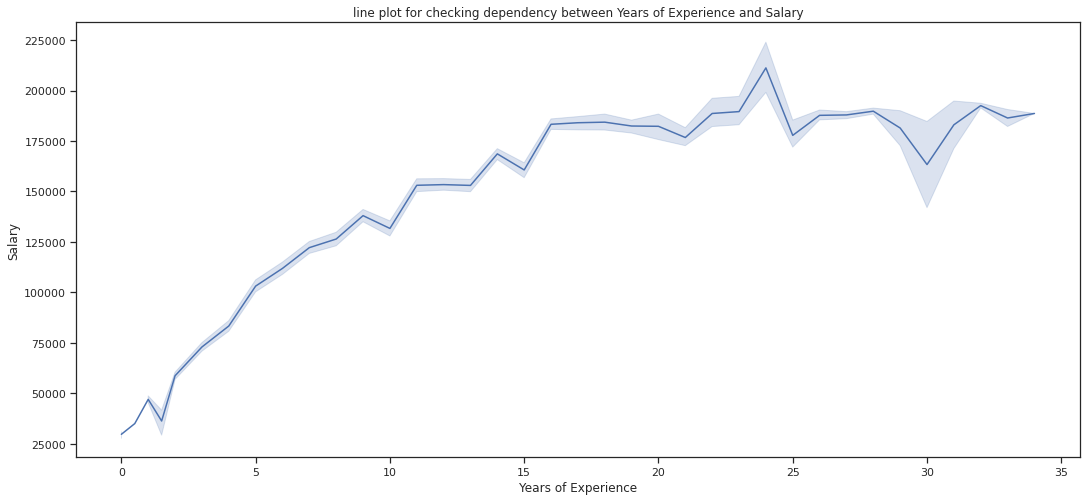

In [0]:
plt.figure(figsize=(10,8))
for x in df_non_null.columns:
    if x == 'Salary':
       pass
    else:
        plt.figure(figsize=(18,8))
        ax=sns.lineplot(x=f'{x}', y='Salary',data=df_non_null)
        ax.set_title(f'line plot for checking dependency between {x} and Salary')
        plt.show()

Out[95]: <seaborn.axisgrid.PairGrid at 0x7f8ed0eb8ca0>

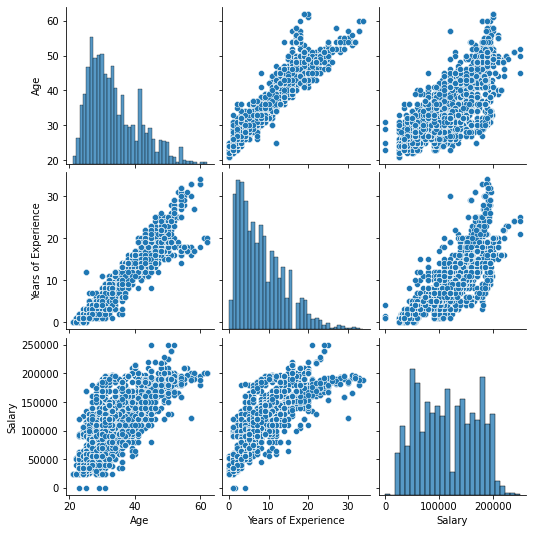

In [0]:
sns.pairplot(df_non_null)

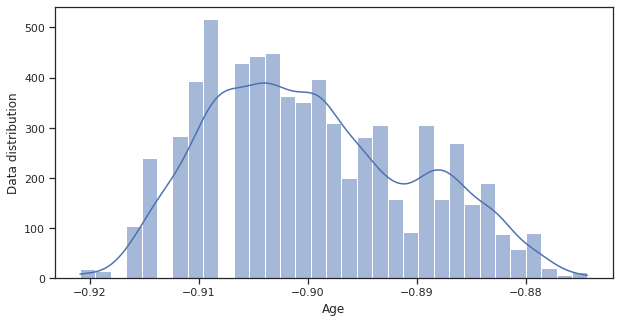

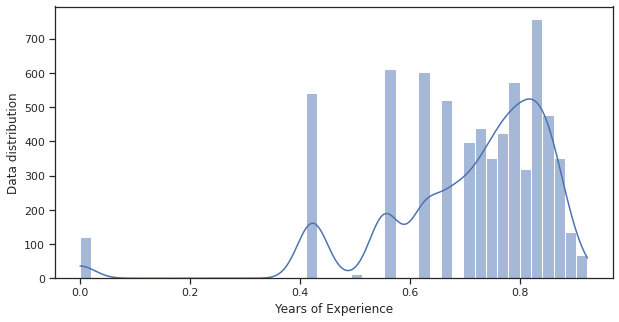

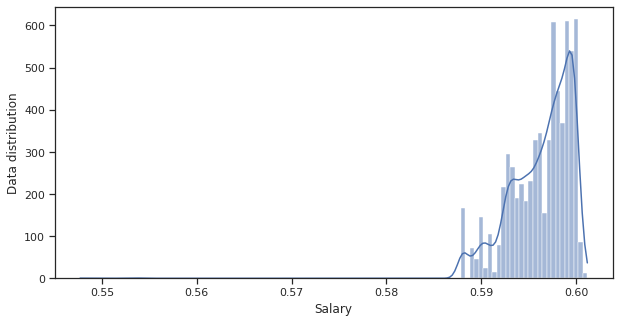

In [0]:
numeric = df_non_null.select_dtypes(include = 'float64')
for x in numeric.columns:
    plt.figure(figsize=(10,5))
    sns.histplot(df_non_null[f'{x}'],kde=True)
    plt.xlabel(f'{x}')
    plt.ylabel('Data distribution')
    plt.show()

In [0]:
lst = []
for x in numeric.columns:
    print(f'Skewness of column {x}',df_non_null[f'{x}'].skew())
    lst.append(df_non_null[f'{x}'].skew())

Skewness of column Age 0.9051232700582525
Skewness of column Years of Experience 0.9807657846031701
Skewness of column Salary 0.05721430329226778


In [0]:
print(numeric.columns)

Index(['Age', 'Years of Experience', 'Salary'], dtype='object')


In [0]:
print(lst)

[0.9051232700582525, 0.9807657846031701, 0.05721430329226778]


In [0]:
from pyspark.sql.types import *
schema = StructType([
    StructField('Age', FloatType(), True),
    StructField('Years of Experience', FloatType(), True),
    StructField('Salary', FloatType(), True)
])
df_skew = spark.createDataFrame([(0.9051232700582525, 0.9807657846031701, 0.05721430329226778)],schema)

In [0]:
df_skew.display()

Age,Years of Experience,Salary
0.9051233,0.98076576,0.057214305


In [0]:
df_non_null.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [0]:
y = df_non_null["Salary"]
X = df_non_null.drop(columns = ["Salary", "Job Title"])

In [0]:
X.head()

,Age,Gender,Education Level,Years of Experience
0,32.0,Male,Bachelor's,5.0
1,28.0,Female,Master's,3.0
2,45.0,Male,PhD,15.0
3,36.0,Female,Bachelor's,7.0
4,52.0,Male,Master's,20.0


In [0]:
y.head()

Out[7]: 0     90000.0
1     65000.0
2    150000.0
3     60000.0
4    200000.0
Name: Salary, dtype: float64

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5023, 4) (5023,)
(1675, 4) (1675,)


In [0]:
X_train.dtypes

Out[9]: Age                    float64
Gender                  object
Education Level         object
Years of Experience    float64
dtype: object

In [0]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_num = X_train.select_dtypes(include=['float64'])

In [0]:
X_train_cat.head()

,Gender,Education Level
2168,Male,PhD
5298,Male,Bachelor's Degree
4659,Male,High School
3816,Female,Master's Degree
935,Female,Bachelor's


In [0]:
X_train_num.head()

,Age,Years of Experience
2168,49.0,17.0
5298,26.0,1.0
4659,25.0,1.0
3816,26.0,3.0
935,28.0,5.0


In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = scaler.get_feature_names_out(), 
                                    index = X_train_num.index)

X_train_num_transformed.head()

,Age,Years of Experience
2168,2.013239,1.463217
5298,-1.006632,-1.178941
4659,-1.137931,-1.178941
3816,-1.006632,-0.848671
935,-0.744035,-0.518401


In [0]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(sparse=False)
X_train_cat_tansformed = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(), 
                               index = X_train_cat.index)

X_train_cat_tansformed.head()

,Gender_Female,Gender_Male,Gender_Other,Education Level_Bachelor's,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's,Education Level_Master's Degree,Education Level_PhD
2168,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5298,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4659,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3816,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
935,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [0]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_tansformed], axis=1)
X_train_transformed.head()

,Age,Years of Experience,Gender_Female,Gender_Male,Gender_Other,Education Level_Bachelor's,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's,Education Level_Master's Degree,Education Level_PhD
2168,2.013239,1.463217,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5298,-1.006632,-1.178941,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4659,-1.137931,-1.178941,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3816,-1.006632,-0.848671,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
935,-0.744035,-0.518401,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [0]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

In [0]:
X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = scaler.get_feature_names_out(), 
                                   index = X_test_num.index)

X_test_num_transformed.head()

,Age,Years of Experience
1269,3.194927,1.463217
5735,-0.087541,0.142138
1787,-0.744035,-1.013806
422,-0.350139,-0.353266
4692,-0.612736,-0.848671


In [0]:
X_test_cat.loc[X_test_cat['Education Level'] == 'phD','Education Level'] = 'PhD'

In [0]:
X_test_cat_tansformed = pd.DataFrame(encoder_.transform(X_test_cat), 
                               columns=encoder_.get_feature_names_out(), 
                               index = X_test_cat.index)

In [0]:
X_test_transformed = pd.concat([X_test_num_transformed,X_test_cat_tansformed], axis=1)

X_test_transformed.head()

,Age,Years of Experience,Gender_Female,Gender_Male,Gender_Other,Education Level_Bachelor's,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's,Education Level_Master's Degree,Education Level_PhD
1269,3.194927,1.463217,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5735,-0.087541,0.142138,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1787,-0.744035,-1.013806,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
422,-0.350139,-0.353266,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4692,-0.612736,-0.848671,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [0]:
import numpy as np

In [0]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True,random_state=42)
parameter={'n_neighbors': np.arange(2, 30, 1)}
knn_cv = GridSearchCV(regressor, param_grid=parameter, cv=kf, verbose=1)
knn_cv.fit(X_train_transformed, y_train)
print(knn_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'n_neighbors': 3}


In [0]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

regressor = KNeighborsRegressor(n_neighbors = 3)
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

metrics.mean_absolute_error(y_test, y_test_pred)

Out[36]: 6836.867064676616

In [0]:
output_df = pd.DataFrame({'Actual': y_test})

In [0]:
output_df['KNN Regression Predictions'] = y_test_pred
output_df

,Actual,KNN Regression Predictions
1269,200000.0,198333.333333
5735,130000.0,131865.333333
1787,65000.0,36333.333333
422,155000.0,155000.000000
4692,55000.0,55000.000000
...,...,...
4355,26000.0,25666.666667
1792,190000.0,173333.333333
1894,195000.0,195000.000000
3217,55000.0,55000.000000


In [0]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop =600, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800]}

{'n_estimators': [200, 244, 288, 333, 377, 422, 466, 511, 555, 600], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Out[46]: {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800]}

In [0]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
 max_depth =70,
 min_samples_leaf = 4,
 min_samples_split = 10,
 n_estimators = 400)
rf_random.fit(X_train_transformed, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
